## ** 什么是混合效应模型（ Mixed-effects Models）？**
- 混合效应模型因同时包含固定效应和随机效应。
## ** 什么是固定效应（fixed effects）？**
- 混合效应模型中的固定效应是指在模型中对所有观测值影响相同的因素。
## ** 什么是随机效应（random effect）？**
- 随机效应是指模型中因个体差异或群体差异而产生的、对不同观测值有不同影响的因素。

## 1.1 一个简单的随机效应示例
- 随机选取了六根铁轨，对每根铁轨测试三次（测量超声波沿铁轨长度传播所需的时间）。这些观测值之间唯一变化的实验条件就是铁轨本身。
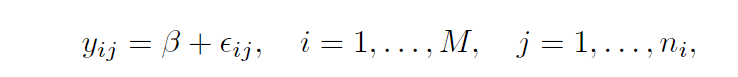
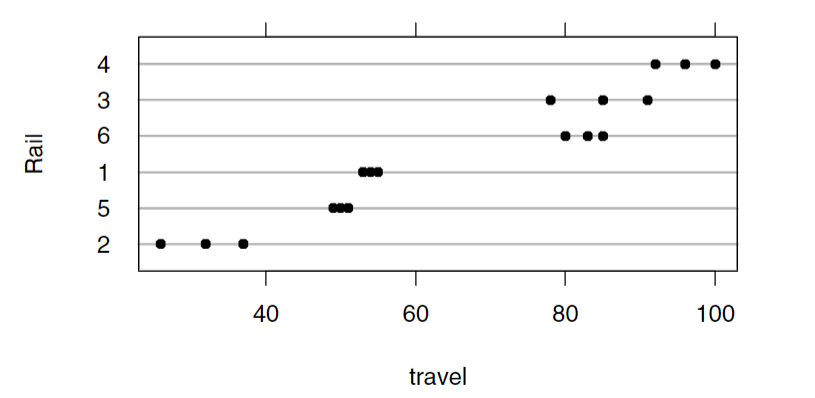

In [4]:
# install.packages("nlme")
library(nlme)

In [9]:
fm1Rail.lm <- lm( travel ~ 1, data = Rail )
summary(fm1Rail.lm)


Call:
lm(formula = travel ~ 1, data = Rail)

Residuals:
   Min     1Q Median     3Q    Max 
-40.50 -16.25   0.00  18.50  33.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   66.500      5.573   11.93  1.1e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.65 on 17 degrees of freedom



- #### 导致的问题：忽略了分组因素
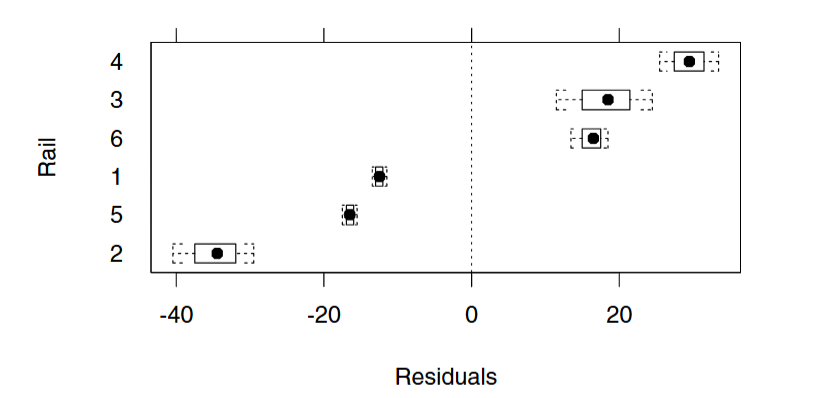


设置分组因素（Rail）的固定效应
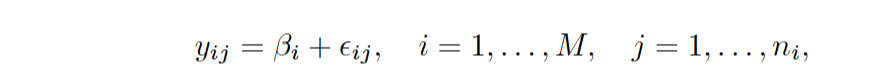

In [15]:
# fixed effect model
fm2Rail.lm <- lm( travel ~ Rail - 1, data = Rail )
summary(fm2Rail.lm)


Call:
lm(formula = travel ~ Rail - 1, data = Rail)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6667 -1.0000  0.1667  1.0000  6.3333 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
Rail2   31.667      2.321   13.64 1.15e-08 ***
Rail5   50.000      2.321   21.54 5.86e-11 ***
Rail1   54.000      2.321   23.26 2.37e-11 ***
Rail6   82.667      2.321   35.61 1.54e-13 ***
Rail3   84.667      2.321   36.47 1.16e-13 ***
Rail4   96.000      2.321   41.35 2.59e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.021 on 12 degrees of freedom
Multiple R-squared:  0.9978,	Adjusted R-squared:  0.9967 
F-statistic: 916.6 on 6 and 12 DF,  p-value: 2.971e-15


- #### 导致的问题：
- 问题：无法从该模型中得到铁轨间变异性的估计。
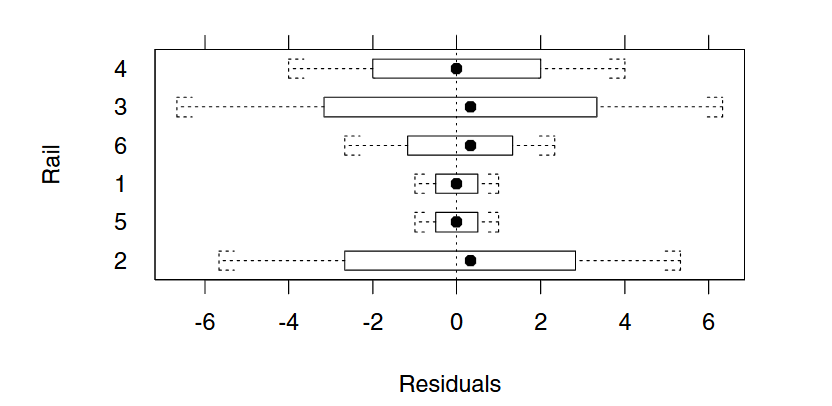
建模铁轨间的随机效应
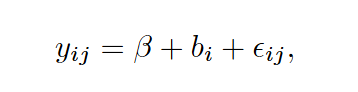
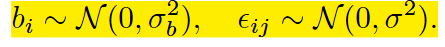
### bi 即随机效应（random effect）
- 为啥称之为随机？
其随机性源于实验单位选取的随机性。
- 为啥称之为效应？
代表与总体均值的偏差，选择第根铁轨会使平均传播时间从 B 变为 B + bi，体现了其 “效应” 特性


In [8]:
# 用 lme 拟合随机效应模型
fm1Rail.lme <- lme(travel ~ 1, data = Rail, random = ~ 1 | Rail)
summary(fm1Rail.lme)

Linear mixed-effects model fit by REML
  Data: Rail 
      AIC      BIC   logLik
  128.177 130.6766 -61.0885

Random effects:
 Formula: ~1 | Rail
        (Intercept) Residual
StdDev:    24.80547 4.020779

Fixed effects:  travel ~ 1 
            Value Std.Error DF  t-value p-value
(Intercept)  66.5  10.17104 12 6.538173       0

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.61882658 -0.28217671  0.03569328  0.21955784  1.61437744 

Number of Observations: 18
Number of Groups: 6 

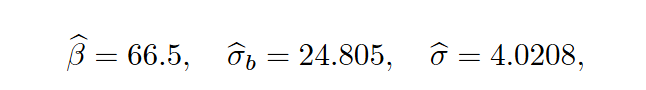

#### AIC 和 BIC
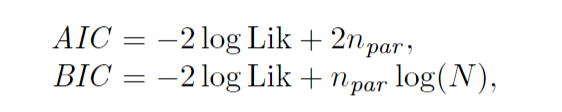

#### 残差分部

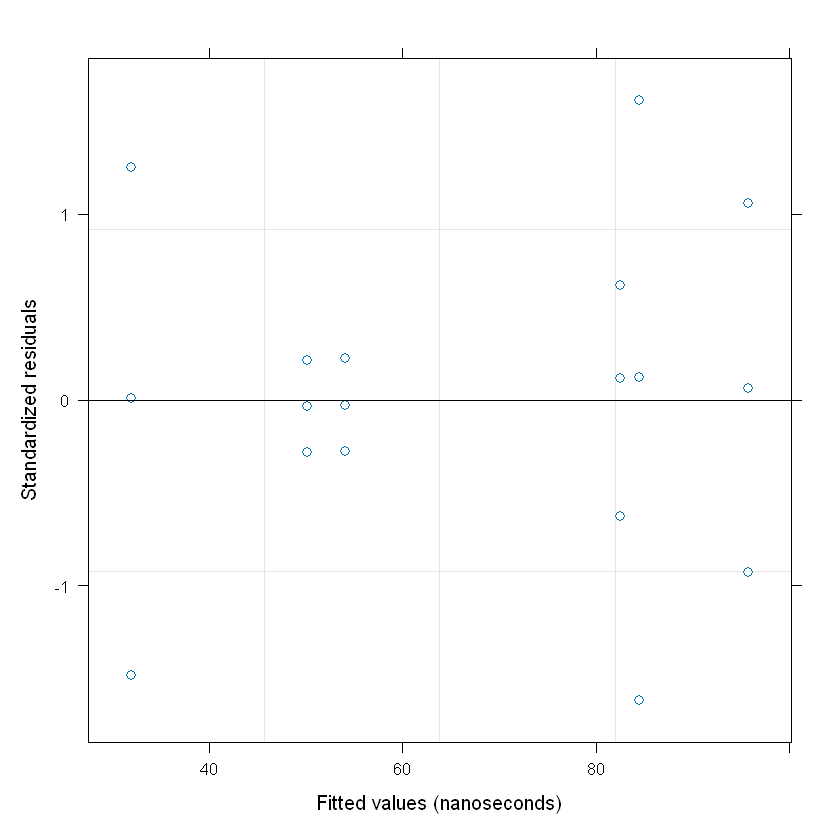

In [16]:
plot(fm1Rail.lme)

#### 核心参数的置信区间

In [17]:
intervals(fm1Rail.lme)

Approximate 95% confidence intervals

 Fixed effects:
               lower est.    upper
(Intercept) 44.33921 66.5 88.66079

 Random Effects:
  Level: Rail 
                   lower     est.    upper
sd((Intercept)) 13.27436 24.80547 46.35335

 Within-group standard error:
   lower     est.    upper 
2.695012 4.020779 5.998737 

#### 检验 fixed-effect
- 在此模型中假设 B = 0

In [18]:
anova( fm1Rail.lme )

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,12,42.7477,2.776951e-05


- p 值是指当 β 实际上为 0 的概率，该 p 值非常小，以至于可以排除这种（β = 0 的）可能性。